In [2]:
from IPython.display import display
import pyarrow.parquet as pq
import pandas as pd
import numpy as np

### Open Parquet format data

- In data suscription, 
    - 137x236 grayscale images
    - image_id column, and the flattened image

- train_image_data 0/1/2/3
- test_image_data 0/1/2/3

#### Image-pixel mean std (normalize)

- mean :
- std :

In [3]:
p0 = pq.ParquetDataset('../data/bengaliai-cv19/train_image_data_0.parquet')
p1 = pq.ParquetDataset('../data/bengaliai-cv19/train_image_data_1.parquet')
p2 = pq.ParquetDataset('../data/bengaliai-cv19/train_image_data_2.parquet')
p3 = pq.ParquetDataset('../data/bengaliai-cv19/train_image_data_3.parquet')

table0 = p0.read()
table1 = p1.read()
table2 = p2.read()
table3 = p3.read()

In [4]:
# flattend image 137*236 = 32332 , gray_scale
t0 = table0.to_pandas()
t1 = table1.to_pandas()
t2 = table2.to_pandas()
t3 = table3.to_pandas()

In [5]:
tmp0 = t0.iloc[:,1:]
tmp1 = t1.iloc[:,1:]
tmp2 = t2.iloc[:,1:]
tmp3 = t3.iloc[:,1:]

In [6]:
arr = []
arr.extend(tmp0.to_numpy())
arr.extend(tmp1.to_numpy())
arr.extend(tmp2.to_numpy())
arr.extend(tmp3.to_numpy())

200840

In [10]:
mean = np.mean(arr)
std = np.std(arr)

print('train data length :', len(arr))
print('mean :', mean)
print('std :', std)

train data length : 200840
mean : 241.47665114988533
std : 42.22726952583576


In [12]:
print(mean/256, std/256)

0.9432681685542396 0.16495027158529593


### CSV file 

- class_map.csv -> class_map_corrected.csv (?)
- train.csv
- train_multi_diacritics.csv
- test.csv

grapheme_root          168
vowel_diacritic         11
consonant_diacritic      8
Name: component_type, dtype: int64


<AxesSubplot:>

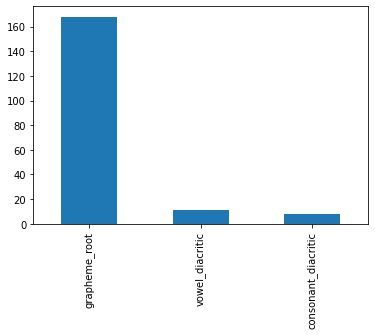

In [85]:
#각 target class 별 종류 개수 
data = pd.read_csv('../data/bengaliai-cv19/class_map_corrected.csv')
component_type = data['component_type'].value_counts()
print(component_type)
component_type.plot.bar()
# data

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

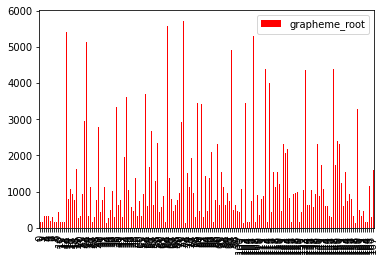

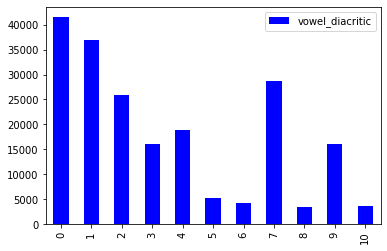

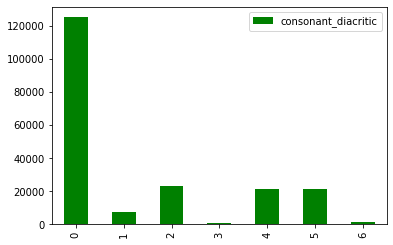

In [97]:
# train_data 200840개 
data1 = pd.read_csv('../data/bengaliai-cv19/train.csv')
# display(data1.head())

grapheme = pd.DataFrame(data1['grapheme_root'].value_counts().sort_index())
vowel = pd.DataFrame(data1['vowel_diacritic'].value_counts().sort_index())
consonant = pd.DataFrame(data1['consonant_diacritic'].value_counts().sort_index())

# print(grapheme.sum(), vowel.sum(), consonant.sum())

display(grapheme.plot.bar(color = 'red'))
display(vowel.plot.bar(color = 'blue'))
display(consonant.plot.bar(color = 'green'))

In [99]:
# Train_multi_diacritics.csv is a list of the affected rows in the training set. Approximately 450 rows were affected in each of the train and test sets.
# Two of the consonant diacritics র্ (class 2) and ্র ( class 5) can coexist in the same grapheme. The original labeling scheme did not account for this possibility so these cases are labeled as class (2) for the purpose of this competition.
# 이 csv 파일에 있는 데이터는 consonant class 2, 5가 동시에 있는 파일로 class2로 분류 하면 됨.
data2 = pd.read_csv('../data/bengaliai-cv19/train_multi_diacritics.csv')

print(data2['grapheme_root'].value_counts(),
    data2['vowel_diacritic'].value_counts(),
    data2['consonant_diacritic'].value_counts())
# display(data2)

64    295
72    151
Name: grapheme_root, dtype: int64 0    151
7    150
3    145
Name: vowel_diacritic, dtype: int64 7    446
Name: consonant_diacritic, dtype: int64
